In [6]:
import pandas as pd
#数据加载
train = pd.read_csv("D:\data engine\Data_Engine_with_Python-master\L6\jetrail/train.csv")
print(train.head())

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2


In [7]:
#转换为Pandas日期格式
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
#把Datetime作为train的索引
train.index = train.Datetime
print(train.head())

                     ID            Datetime  Count
Datetime                                          
2012-08-25 00:00:00   0 2012-08-25 00:00:00      8
2012-08-25 01:00:00   1 2012-08-25 01:00:00      2
2012-08-25 02:00:00   2 2012-08-25 02:00:00      6
2012-08-25 03:00:00   3 2012-08-25 03:00:00      2
2012-08-25 04:00:00   4 2012-08-25 04:00:00      2


In [8]:
#去掉Datetime和ID字段
train.drop(['ID','Datetime'],axis =1,inplace = True)
print(train.head())

                     Count
Datetime                  
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2


In [9]:
#按照天进行采样
daily_train = train.resample('D').sum()
print(daily_train.head())

            Count
Datetime         
2012-08-25     76
2012-08-26     88
2012-08-27     62
2012-08-28     58
2012-08-29     60


In [10]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'],axis=1,inplace = True)
print(daily_train.head)

<bound method NDFrame.head of                    ds      y
Datetime                    
2012-08-25 2012-08-25     76
2012-08-26 2012-08-26     88
2012-08-27 2012-08-27     62
2012-08-28 2012-08-28     58
2012-08-29 2012-08-29     60
...               ...    ...
2014-09-21 2014-09-21   9102
2014-09-22 2014-09-22  14116
2014-09-23 2014-09-23  13304
2014-09-24 2014-09-24  16856
2014-09-25 2014-09-25  14152

[762 rows x 2 columns]>


In [11]:
from fbprophet import Prophet
#拟合prophet模型
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
m.fit(daily_train)
# 预测未来7个月，213天
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)
#打印预测结果
print(forecast)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2012-08-25   -686.475171  -2328.176348     58.538738   -686.475171   
1   2012-08-26   -678.372660  -2463.721047    -37.184052   -678.372660   
2   2012-08-27   -670.270149   -908.366353   1525.576694   -670.270149   
3   2012-08-28   -662.167638   -696.627705   1689.585815   -662.167638   
4   2012-08-29   -654.065127   -815.391087   1548.882402   -654.065127   
..         ...           ...           ...           ...           ...   
970 2015-04-22  16243.879057  15288.387972  17739.676969  15818.502489   
971 2015-04-23  16271.394404  15009.705767  17518.249551  15840.675291   
972 2015-04-24  16298.909751  14846.788656  17442.386471  15863.909221   
973 2015-04-25  16326.425097  13612.784336  16237.368090  15889.767185   
974 2015-04-26  16353.940444  13557.384123  16033.610241  15915.675769   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -686.475171     -422.261

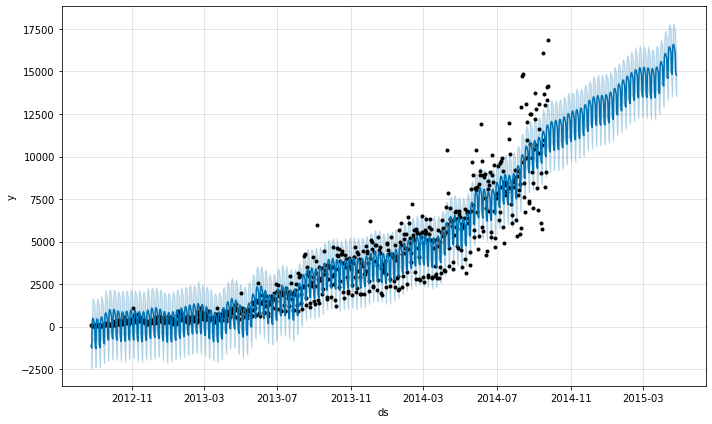

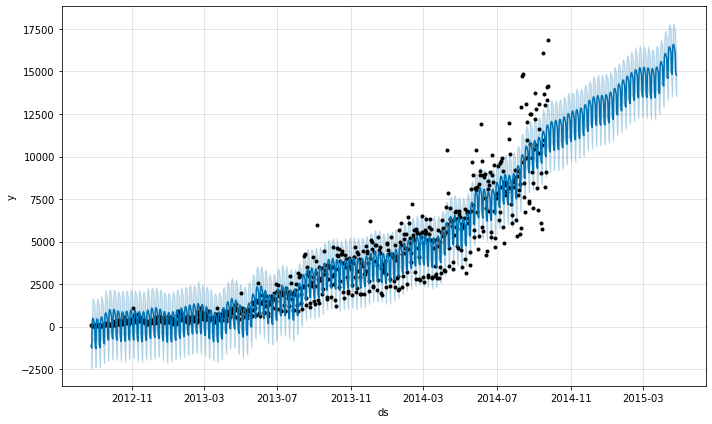

In [12]:
#绘制预测结果
m.plot(forecast)

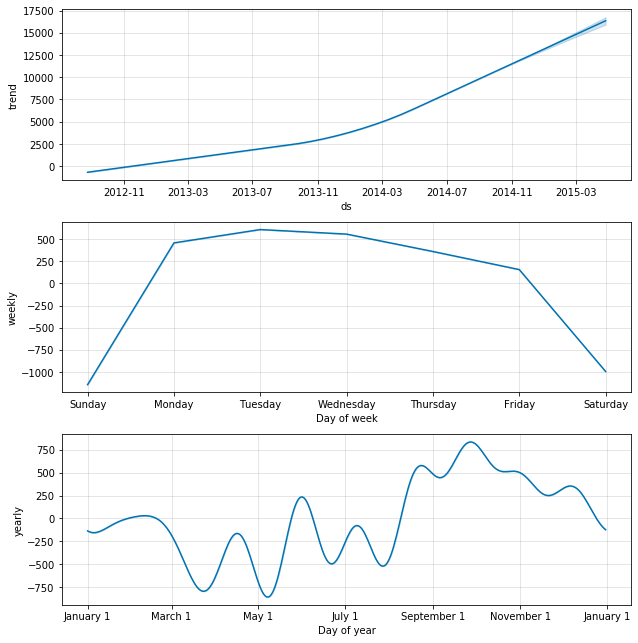

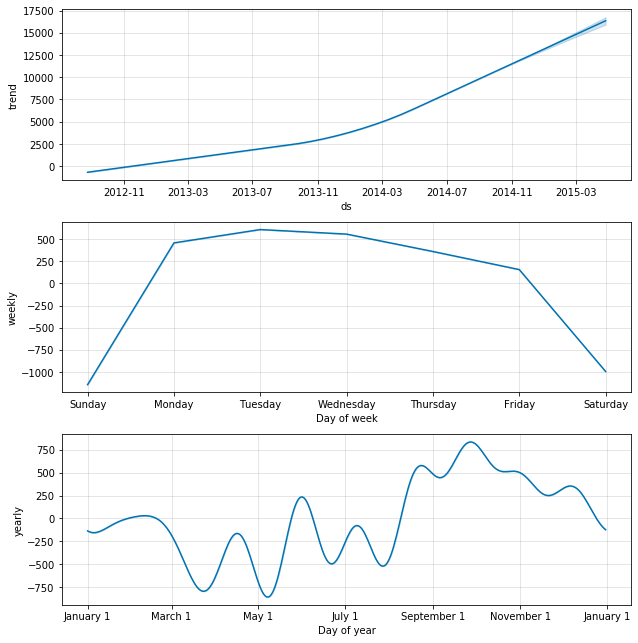

In [13]:
#查看各个构成成分
m.plot_components(forecast)

In [14]:
import pandas as pd
# 对节假日建模
# 将节日看成是一个正态分布，把活动期间当做波峰，lower_window 以及upper_window 的窗口作为扩散
chinese_seasons = pd.DataFrame({
  'holiday': 'chinese_season',
  'ds': pd.to_datetime(['2012-01-01', '2012-05-01', '2012-10-01',
                        '2013-01-01', '2013-05-01', '2013-10-01',
                        '2014-01-01', '2014-05-01', '2014-10-01',
                        '2015-01-01', '2015-05-01', '2015-10-01']),
  'lower_window': 0,
  'upper_window': 1,
})
print(chinese_seasons)

           holiday         ds  lower_window  upper_window
0   chinese_season 2012-01-01             0             1
1   chinese_season 2012-05-01             0             1
2   chinese_season 2012-10-01             0             1
3   chinese_season 2013-01-01             0             1
4   chinese_season 2013-05-01             0             1
5   chinese_season 2013-10-01             0             1
6   chinese_season 2014-01-01             0             1
7   chinese_season 2014-05-01             0             1
8   chinese_season 2014-10-01             0             1
9   chinese_season 2015-01-01             0             1
10  chinese_season 2015-05-01             0             1
11  chinese_season 2015-10-01             0             1


In [15]:
from fbprophet import Prophet
model = Prophet(holidays=chinese_seasons, daily_seasonality=True)
model.fit(daily_train)
future = model.make_future_dataframe(periods=213)
forecast = model.predict(future)
print(forecast.tail())

            ds         trend    yhat_lower    yhat_upper   trend_lower  \
970 2015-04-22  16823.175357  15276.693266  17696.992415  16423.372756   
971 2015-04-23  16850.589005  15095.867340  17529.472365  16447.889340   
972 2015-04-24  16878.002652  14813.659524  17422.706113  16472.449616   
973 2015-04-25  16905.416300  13670.410596  16189.270022  16497.210485   
974 2015-04-26  16932.829947  13414.011230  16002.406071  16521.971354   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
970  17242.434580     -305.579777           -305.579777           -305.579777   
971  17272.471283     -537.915368           -537.915368           -537.915368   
972  17303.711843     -784.092754           -784.092754           -784.092754   
973  17335.082808    -1981.072717          -1981.072717          -1981.072717   
974  17366.453773    -2177.356927          -2177.356927          -2177.356927   

     chinese_season  ...       weekly  weekly_lower  weekly_upper   

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'chinese_season', 'chinese_season_lower', 'chinese_season_upper',
       'daily', 'daily_lower', 'daily_upper', 'holidays', 'holidays_lower',
       'holidays_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly',
       'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


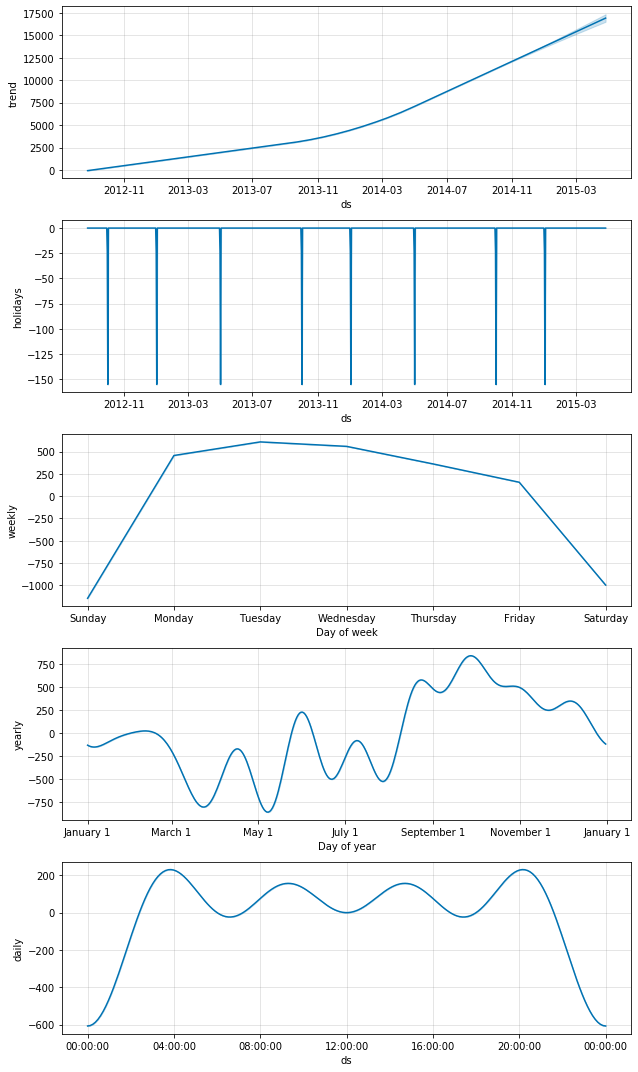

In [16]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应,holidays项
model.plot_components(forecast)
print(forecast.columns)